In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from implementations import *
from helpers import *
from data_processing import *
from cross_validation import *

## How to use it

In [2]:
features, labels = load_data()

In [3]:
train_tx, train_y, test_tx, test_y = preprocessing(features, labels)
weights, loss = least_squares(train_y, train_tx)
train_score, test_score = correctness(train_tx, train_y, test_tx, test_y, weights)

There are 74.42228571428572% correct prediction in the training set
There are 74.404% correct prediction in the test set


In [4]:
train_tx, train_y, test_tx, test_y = preprocessing(features, labels, dtype = 'row')
weights, loss = least_squares(train_y, train_tx)
train_score, test_score = correctness(train_tx, train_y, test_tx, test_y, weights)

There are 72.69238029321085% correct prediction in the training set
There are 72.40029361389773% correct prediction in the test set


## Cross validation

In [5]:
features, labels = load_data()

In [6]:
train_tx, train_y, test_tx, test_y = preprocessing(features, labels)

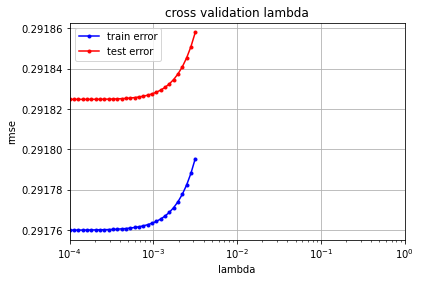

In [16]:
def cross_validation_lambda_demo():
    seed = 1
    k_fold = 10
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(train_y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # compute loss for each lambda is lambdas
    for i in range(len(lambdas)):
        rmse_tr_tmp = []
        rmse_te_tmp = []
        for k in range(k_fold):
            loss_tr, loss_te = cross_validation(train_y, train_tx, k_indices, k, lambdas[i])
            rmse_tr_tmp.append(loss_tr)
            rmse_te_tmp.append(loss_te)
            
        rmse_tr.append(np.mean(rmse_tr_tmp))
        rmse_te.append(np.mean(rmse_te_tmp))
    
    cross_validation_lambda_visualization(lambdas, rmse_tr, rmse_te)
        
cross_validation_lambda_demo()